In [2]:
!pip install tweepy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install configparser

Defaulting to user installation because normal site-packages is not writeable
  Using cached configparser-5.2.0-py3-none-any.whl (19 kB)


In [4]:
import tweepy
import configparser
import pandas as pd


### Authentication Handling

In [5]:
config = configparser.RawConfigParser()
config.read('config.ini')

api_key = config['twitter']['api_key']
api_key_secret =  config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



#### Python environment setup

In [6]:
#!pip install requests
#!pip install searchtweets

In [7]:
import requests
import json
import datetime
bearer_token = config['twitter']['bearer_code']
start_time = datetime.datetime(2021,3,9)
end_time = datetime.datetime.now(datetime.timezone.utc)

In [8]:
end_time.isoformat()
start_time.isoformat()

'2021-03-09T00:00:00'

In [9]:

Client = tweepy.Client(bearer_token=bearer_token)

# Code to search recent searches limit - 10 to 100
# twts_all = Client.search_recent_tweets('S&P-500', end_time = end_time, start_time= start_time, max_results = 100)


In [10]:
auth = tweepy.OAuthHandler(consumer_key = api_key, consumer_secret=api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


Searching on the twitter with query q using api.

In [11]:
search_reults = api.search_tweets(q = 'S&P-500', lang = 'en', result_type = 'popular', count = 10, tweet_mode="extended")

In [12]:
json_data = [r._json for r in search_reults]
df = pd.json_normalize(json_data)

In [13]:
df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries,possibly_sensitive,entities.media,extended_entities.media
0,Fri Jul 08 17:57:17 +0000 2022,1545467070594199552,1545467070594199552,The S&amp;P 500 fell 16.5% in Q2; a terrible q...,False,"[0, 284]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,False,False,False,False,False,none,[],NaN,NaN,NaN
1,Tue Jul 05 19:10:28 +0000 2022,1544398324559667206,1544398324559667206,The S&amp;P 500 is having its worst year since...,False,"[0, 103]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,True,False,False,False,False,none,[],NaN,NaN,NaN


In [14]:
for i in range(10):
    print("************** ", i," **************" )
    print(df.iat[i,3])  

**************  0  **************
The S&amp;P 500 fell 16.5% in Q2; a terrible quarter. We are not completely out of the woods technically or macro economically, but history suggests that unless the economy is in a deep recession, the market should rebound in the 2nd half and any decline from here should be the last.
**************  1  **************
The S&amp;P 500 is having its worst year since 1872.

Only Joe Biden could break a 150-year-old record.
**************  2  **************
The Dow just had its worst 6 months to start a year since 1962.

The Nasdaq its worst ever.

The S&amp;P 500 its worst since 1970.
**************  3  **************
Only a few trading days into July, but thus far, jump in S&amp;P 500's forward P/E is strongest since December 2021 ... notable that forward monthly EPS growth has been decelerating this year https://t.co/f0r8WKeqGC
**************  4  **************
Leading stocks higher in current rally: speculative areas like non-profitable tech and most-sh

#### Dataset preparation

I have used the dataset for the tweets from this source: [Stock Market Tweet | Sentiment Analysis lexicon](https://datasetsearch.research.google.com/search?src=0&query=stock%20market%20tweet&docid=L2cvMTFsbDY3dzZzag%3D%3D)

In [104]:
path_labelled = r'Datasets\tweets\tweets_labelled_09042020_16072020.csv'
dfLabelled = pd.read_csv(path_labelled, sep = ';')
dfLabelled.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


I will use the remaining dataframe and apply sentiment analysis to obtain the sentiment from the tweet. 

In [120]:
import numpy as np
import os
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pprint import pprint
from datetime import datetime
import collections
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from time import sleep
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from pylab import rcParams

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [121]:
# Set intial variables and constants
%config InlineBackend.figure_format='retina'

# Graph Designs
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

# Random seed for reproducibilty
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
!pip install wordcloud
from wordcloud import WordCloud


Defaulting to user installation because normal site-packages is not writeable


In [105]:
dfLabelled.head()

,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",positive
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,negative
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive


#### Quick view of the full tweets  

In [107]:
for i in tqdm(range(5)):
    pprint(dfLabelled.iat[i,2])

100%|██████████| 5/5 [00:00<00:00, 2157.12it/s]

('RT @RobertBeadles: Yo💥\n'
 'Enter to WIN 1,000 Monarch Tokens✅\n'
 '\n'
 'US Stock Market Crashes &amp; what we can LEARN from them PT3!\n'
 '\n'
 'RETWEET, WATCH video…')
('#SriLanka surcharge on fuel removed!\n'
 '⛽📉\n'
 'The surcharge of Rs.26 imposed on diesel and petrol has been revoked with '
 'effect from midnight on June 23 says Power, Energy and Transport Minister '
 'Mahinda. Amaraweera -Adaderana-\n'
 '\n'
 '#lka #FuelPrices #taxes #economy #stocks #StockMarket')
('Net issuance increases to fund fiscal programs &gt; yields spike higher &gt; '
 'risk off: #stocks and #EMFX correct lower &gt; #Fed comes in with #YCC &gt; '
 'stocks to new all time highs with 20% unemployment and -25% GDP. Fin.')
("RT @bentboolean: How much of Amazon's traffic is served by Fastly? Help us "
 'find out by running this tool from your IP address: https://t.co…')
('$AMD Ryzen 4000 desktop CPUs looking ‘great’ and on track to launch in 2020 '
 'https://t.co/y7yYvXOVYJ #madtweets #stocks #cnbc #AMD

In [21]:
dfLabelled.shape

(5000, 3)

### Checking for NaNs and cleaning

In [109]:
dfLabelled.isnull().sum()

id               0
created_at       0
text             0
sentiment     3700
dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


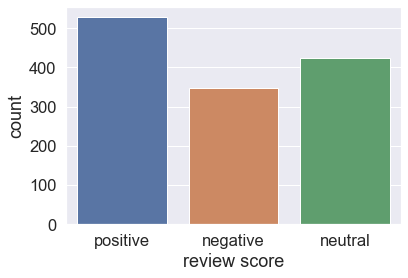

In [110]:
# Let's have a look at the class balance.
sns.countplot(dfLabelled.sentiment)
plt.xlabel('review score');

In [111]:
def convert_sentiment(row):
    if row == 'negative':
        return 0
    elif row == 'neutral':
        return 1
    elif row == 'positive':
        return 2

dfLabelled['sentiment'] = dfLabelled.sentiment.apply(convert_sentiment)
dfLabelled.head()



,id,created_at,text,sentiment
0,77522,2020-04-15 01:03:46+00:00,"RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...",2.0
1,661634,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\n⛽📉\nThe ...,0.0
2,413231,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,2.0
3,760262,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,2.0
4,830153,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,2.0


### Data Preprocessing

In [112]:
# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [113]:
print(tokenizer.sep_token, tokenizer.sep_token_id) # marker for ending of a sentence
print(tokenizer.cls_token, tokenizer.cls_token_id) # start of each sentence, so BERT knows we’re doing classification
print(tokenizer.pad_token, tokenizer.pad_token_id) # special token for padding
print(tokenizer.unk_token, tokenizer.unk_token_id) # tokens not found in training set 

[SEP] 102
[CLS] 101
[PAD] 0
[UNK] 100


In [114]:
# Store length of each review 
token_lens = []

# Iterate through the content slide
for txt in dfLabelled.text:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

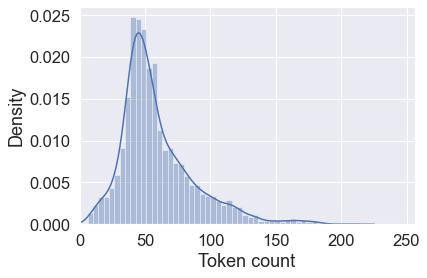

In [115]:
# plot the distribution of review lengths 
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

We observe that most of the tweets have around 200 tokens. To be on safer side We choose the max length of 250.

In [116]:
MAX_LEN = 250

### Preparing Torch Dataset

In [118]:
class TweetSentiDataset(Dataset):
    # Constructor Function 
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    # Length magic method
    def __len__(self):
        return len(self.reviews)
    
    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Encoded format to be returned 
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [125]:

df_train, df_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(8, 75) (1, 75) (1, 75)


In [127]:
df_train

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,user.default_profile,user.default_profile_image,user.following,user.follow_request_sent,user.notifications,user.translator_type,user.withheld_in_countries,possibly_sensitive,entities.media,extended_entities.media
5,Fri Jul 01 03:49:19 +0000 2022,1542716955475558402,1542716955475558402,The last 8 times the S&amp;P 500 was down in a...,False,"[0, 220]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,False,False,False,False,False,none,[],False,"[{'id': 1542716803780075521, 'id_str': '154271...","[{'id': 1542716803780075521, 'id_str': '154271..."
0,Fri Jul 08 17:57:17 +0000 2022,1545467070594199552,1545467070594199552,The S&amp;P 500 fell 16.5% in Q2; a terrible q...,False,"[0, 284]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,False,False,False,False,False,none,[],NaN,NaN,NaN
7,Thu Jun 30 21:40:55 +0000 2022,1542624247335362565,1542624247335362565,the S&amp;P 500 has only been worse when most ...,False,"[0, 120]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,True,False,False,False,False,none,[],False,"[{'id': 1542624243258499072, 'id_str': '154262...","[{'id': 1542624243258499072, 'id_str': '154262..."
2,Thu Jun 30 20:52:30 +0000 2022,1542612063205445634,1542612063205445634,The Dow just had its worst 6 months to start a...,False,"[0, 130]","<a href=""http://twitter.com/download/iphone"" r...",None,None,None,...,False,False,False,False,False,none,[],NaN,NaN,NaN
9,Fri Jul 01 02:16:23 +0000 2022,1542693570875981824,1542693570875981824,.@WSJ: Markets Post Worst First Half of a Year...,False,"[0, 144]","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,None,...,False,False,False,False,False,regular,[],NaN,NaN,NaN
4,Fri Jul 08 11:37:53 +0000 2022,1545371590774366208,1545371590774366208,Leading stocks higher in current rally: specul...,False,"[0, 273]","<a href=""http://twitter.com/#!/download/ipad"" ...",None,None,None,...,True,False,False,False,False,none,[],False,"[{'id': 1545371586416500738, 'id_str': '154537...","[{'id': 1545371586416500738, 'id_str': '154537..."
3,Fri Jul 08 11:47:13 +0000 2022,1545373939416842240,1545373939416842240,"Only a few trading days into July, but thus fa...",False,"[0, 191]","<a href=""http://twitter.com/#!/download/ipad"" ...",None,None,None,...,True,False,False,False,False,none,[],False,"[{'id': 1545373934673076225, 'id_str': '154537...","[{'id': 1545373934673076225, 'id_str': '154537..."
6,Thu Jun 30 20:17:39 +0000 2022,1542603289493229568,1542603289493229568,*S&amp;P 500 SUFFERS WORST FIRST HALF SINCE 19...,False,"[0, 60]","<a href=""http://twitter.com/download/android"" ...",None,None,None,...,False,False,False,False,False,none,[],False,"[{'id': 1542603287177879552, 'id_str': '154260...","[{'id': 1542603287177879552, 'id_str': '154260..."


In [123]:
# Create a dataloader to release data in batches.
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = TweetSentiDataset(
        reviews=df.content.to_numpy(),
        targets=df.sentiment.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=0
    )

In [126]:
# Create train, test and val data loaders
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

AttributeError: 'DataFrame' object has no attribute 'content'

In [23]:
tick_re = re.compile(r'(^\$[A-Z,&,0-9]{1,6})')
hash_re = re.compile(r'#\w+')

tick_dic = collections.defaultdict(int)
hash_dic = collections.defaultdict(int)

for t in tqdm(dfLabelled['text']):
    for w in t.split():
        if tick_re.fullmatch(w):
            tick_dic[w[1:]] += 1
        
        w = w.lower()
        if hash_re.fullmatch(w):
            hash_dic[w] +=1

100%|██████████| 5000/5000 [00:00<00:00, 11762.35it/s]


In [24]:
tick_df = pd.DataFrame.from_dict(tick_dic, orient = 'index').rename(columns={0: 'count'}).sort_values('count',ascending = False)
tick_df.head()

,count
SPX,750
SPY,510
AAPL,497
AMZN,412
FB,376


In [25]:
word_df = pd.DataFrame.from_dict(hash_dic,orient='index').rename(columns={0:'count'}).sort_values('count', ascending = False)
word_df.head()

,count
#stocks,1393
#stockmarket,335
#trading,315
#investing,312
#markets,130


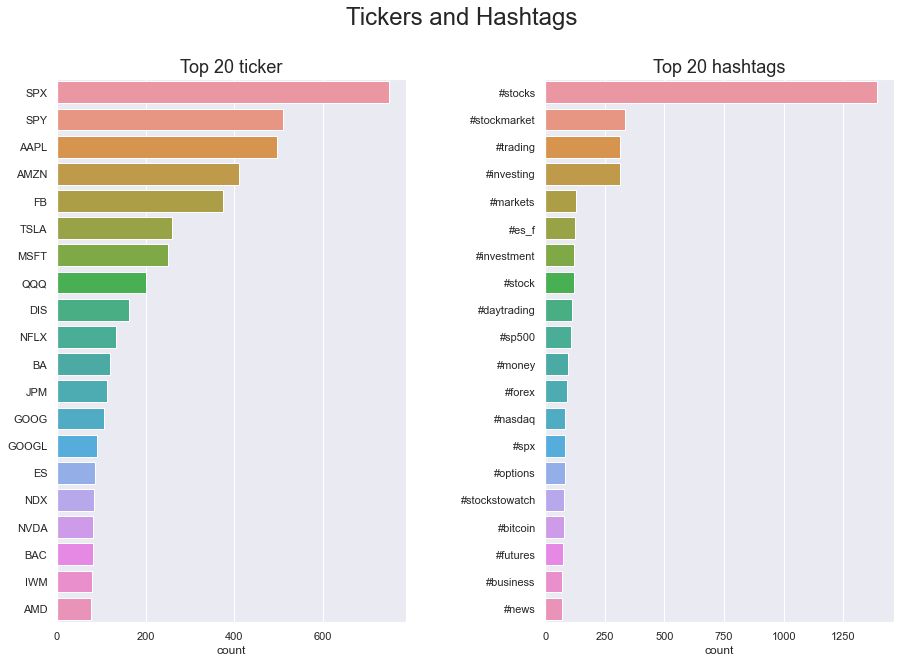

<Figure size 1800x1200 with 0 Axes>

In [26]:
fig, ax = plt.subplots(1,2, figsize = (15,10) )
plt.rc('font', size = 20)

plt.suptitle('Tickers and Hashtags', )
plt.subplots_adjust(wspace=0.4)

sns.set(font_scale = 1.5)
sns.barplot(x = tick_df['count'][:20], y = tick_df.index[:20], ax = ax[0])
ax[0].set_title('Top 20 ticker')

sns.barplot(x = word_df['count'][:20], y = word_df.index[:20], ax = ax[1])
ax[1].set_title('Top 20 hashtags')

plt.figure(dpi = 300);

### Preprocessing the wordCloud now

* Instead of deleting the emoji I will convert it into text and use it as a feature for SA.
* Removing the urls.
* Performing Lemmatization
* deleting the stop words.

In [27]:
# !pip install emot
# !pip install numba
import re
import pickle
import timeit
from numba import jit
'''
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
'''


'\nfrom emot.emo_unicode import UNICODE_EMOJI # For emojis\nfrom emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS\n'

In [28]:
with open('Emoji_Dict.p', 'rb') as fp:
    emoj_dic = pickle.load(fp)
emoj_dic = {v:k for k, v in emoj_dic.items()}


def emo_to_text(text):
    for e in emoj_dic:
        text = re.sub(r'('+e+')', " ".join(emoj_dic[e].replace(",", " ").replace(':', " ").split()), text)
    return text


checking the functionality of emo_to_text() on tweets:

In [29]:
dfLabelled['text']

0       RT @RobertBeadles: Yo💥\nEnter to WIN 1,000 Mon...
1       #SriLanka surcharge on fuel removed!\n⛽📉\nThe ...
2       Net issuance increases to fund fiscal programs...
3       RT @bentboolean: How much of Amazon's traffic ...
4       $AMD Ryzen 4000 desktop CPUs looking ‘great’ a...
                              ...                        
4995    With ad revenues falling, what’s the impact on...
4996    RT @KelvinSCWong: Well another point to add to...
4997    $ITOX working on a contract with a fortune 500...
4998    $DIS it could break the 120 pin, then 125&gt; ...
4999    Amedisys Inc $AMED COO Christopher Gerard Sell...
Name: text, Length: 5000, dtype: object

In [30]:
emo_to_text(dfLabelled['text'][0])

'RT @RobertBeadles: Yocollision\nEnter to WIN 1,000 Monarch Tokenswhite_heavy_check_mark\n\nUS Stock Market Crashes &amp; what we can LEARN from them PT3!\n\nRETWEET, WATCH video…'

Converting all the tweet --> emoji to text

In [31]:
dfLabelled['text'][:2].apply(emo_to_text)

0    RT @RobertBeadles: Yocollision\nEnter to WIN 1...
1    #SriLanka surcharge on fuel removed!\nfuel_pum...
Name: text, dtype: object

In [32]:
dfLabelled.shape

(5000, 3)

In [34]:
start = timeit.default_timer()
dfLabelled['text'] = dfLabelled['text'][:].apply(emo_to_text)
check1 = timeit.default_timer()
dfLabelled.to_csv('updated_emoji_replaced_text.csv', encoding = 'utf-8')
check2 = timeit.default_timer()


In [83]:
df_full_ = pd.read_csv('updated_emoji_replaced_text.csv')

In [80]:
df_full_ = pd.DataFrame(dfLabelled)

In [84]:
char_re = re.compile(r'[^a-zA-Z\s]') # keeps a-z, A-Z & space symbols
handle_re = re.compile(r'@\w+') # detects the handles starting with @
url_re = re.compile(r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
pic_re = re.compile(r'pic\.twitter\.com/.{10}')
spl_re = re.compile(r'(&amp;|&gt;|&lt;)') #special signs
tag_re = re.compile(r'<.*?>')

Handling Stopwords

In [85]:
STOPWORDS = set(stopwords.words('english')).union({'rt', 'retweet', 'RT', 'Retweet', 'RETWEET'})

Lemmatization

In [86]:
lemmatizer = WordNetLemmatizer()

In [87]:
def hashtag(t):
    return hash_re.sub(' ', t)

def remove_ticker(phrase):
    return tick_re.sub('', phrase)
    
def specialcode(phrase):
    return spl_re.sub(' ', phrase)

# def emoji(phrase):
#     return emoji_re.sub(' ', phrase)

def url(phrase):
    return url_re.sub('', phrase)

def pic(phrase):
    return pic_re.sub('', phrase)

def html_tag(phrase):
    return tag_re.sub(' ', phrase)

def handle(phrase):
    return handle_re.sub('', phrase)

In [88]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # DIS, ticker symbol of Disney, is interpreted as the plural of "DI" 
    # in WordCloud, so I converted it to Disney
    phrase = re.sub('DIS', 'Disney', phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"(he|He)\'s", "he is", phrase)
    phrase = re.sub(r"(she|She)\'s", "she is", phrase)
    phrase = re.sub(r"(it|It)\'s", "it is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"(\'ve|has)", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def onlychar(phrase):
    return char_re.sub('', phrase)

def remove_stopwords(phrase):
    return " ".join([word for word in str(phrase).split() if word not in STOPWORDS])

def tokenize_stem(phrase):
    tokens = word_tokenize(phrase)
    stem_words = []
    for token in tokens:
        word = lemmatizer.lemmatize(token)
        stem_words.append(word)
    buf = ' '.join(stem_words)
    return buf

In [89]:
def arrange_text(ds):
    # ds['text2'] = ds['text1'].apply(emo)
    ds['text2'] = ds['text'].apply(handle)
    ds['text2'] = ds['text2'].apply(specialcode)
    ds['text2'] = ds['text2'].apply(hashtag)
    ds['text2'] = ds['text2'].apply(url)
    ds['text2'] = ds['text2'].apply(pic)
    ds['text2'] = ds['text2'].apply(html_tag)
    ds['text2'] = ds['text2'].apply(onlychar)
    ds['text2'] = ds['text2'].apply(decontracted)
    ds['text2'] = ds['text2'].apply(onlychar)
    ds['text2'] = ds['text2'].apply(tokenize_stem)
    ds['text2'] = ds['text2'].apply(remove_stopwords)


In [90]:
df_full_.shape

(5000, 4)

In [ ]:
!pip install --upgrade nltk
!nltk.download('averaged_perceptron_tagger')

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.5/1.5 MB 13.5 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
'nltk.download' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sande\AppData\Roaming\nltk_data...


True

In [91]:
arrange_text(df_full_)

#### Preprocessed tweets:


In [92]:
df_full_['text'].iat[1]

'#SriLanka surcharge on fuel removed!\nfuel_pumpchart_decreasing\nThe surcharge of Rs.26 imposed on diesel and petrol has been revoked with effect from midnight on June 23 says Power, Energy and Transport Minister Mahinda. Amaraweera -Adaderana-\n\n#lka #FuelPrices #taxes #economy #stocks #StockMarket'

In [93]:
df_full_['text2'].iat[1]

'surcharge fuel removed fuelpumpchartdecreasing The surcharge Rs imposed diesel petrol revoked effect midnight June say Power Energy Transport Minister Mahinda Amaraweera Adaderana'

### Checking the WordCloud for preprocessed tweets now

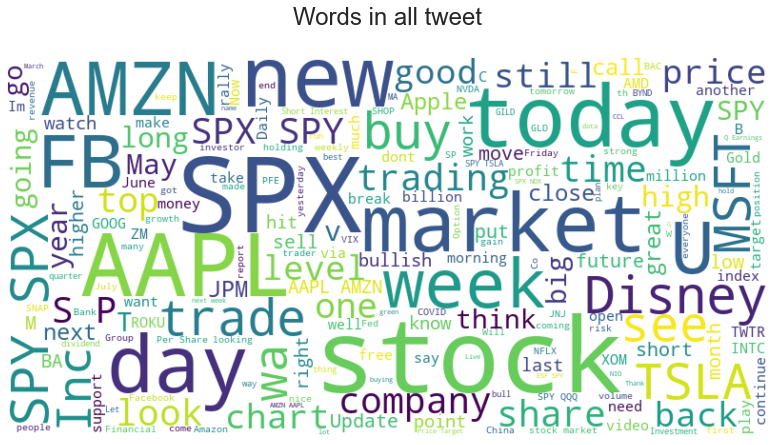

In [94]:
words = ' '.join([text for text in df_full_['text2']])
wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=110).generate(words)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all tweet\n', fontsize=24)
plt.axis('off')
plt.show()

##### We see there are lot of tickers here, so we will create a seperate df without tickers as they don't contain the sentiment information

In [95]:
# getting the list of tickers
# find a specific table by table count

from bs4 import BeautifulSoup

res = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df_ticker = pd.read_html(str(table))
list_ticker = df_ticker[0].to_json(orient='records')

In [96]:
list_ticker[:500]

'[{"Symbol":"MMM","Security":"3M","SEC filings":"reports","GICS Sector":"Industrials","GICS Sub-Industry":"Industrial Conglomerates","Headquarters Location":"Saint Paul, Minnesota","Date first added":"1976-08-09","CIK":66740,"Founded":"1902"},{"Symbol":"AOS","Security":"A. O. Smith","SEC filings":"reports","GICS Sector":"Industrials","GICS Sub-Industry":"Building Products","Headquarters Location":"Milwaukee, Wisconsin","Date first added":"2017-07-26","CIK":91142,"Founded":"1916"},{"Symbol":"ABT",'

### Extracting the tickers from the raw strings

In [97]:
tickerRE= r"(?<=Symbol\":\")[^\"]*"
tickerNameRE = r"(?<=Security\":\")[^\"]*"
absoluteTickers = re.findall(tickerRE, list_ticker)
absoluteTickerNames = re.findall(tickerNameRE, list_ticker)
print(len(absoluteTickers), len(absoluteTickerNames))

503 503


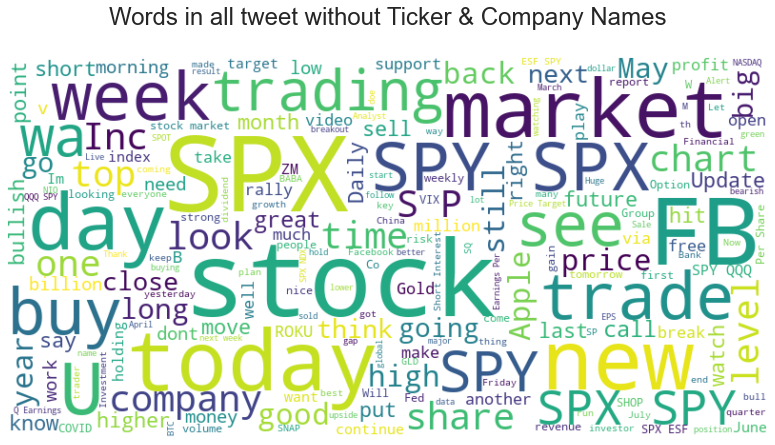

In [65]:
not_ticker = [] # list of words except for Ticker

for text in df_full_['text2']:
    for word in text.split():
        if word not in absoluteTickers+absoluteTickerNames:
            not_ticker.append(word)
            
words = ' '.join([word for word in not_ticker])
wordcloud = WordCloud(
    width=800, height=400, background_color='white', max_font_size=110).\
    generate(words)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Words in all tweet without Ticker & Company Names\n', fontsize=24)
plt.axis('off')
plt.show()

In [98]:
df_full_['text2'].iat[1]

'surcharge fuel removed fuelpumpchartdecreasing The surcharge Rs imposed diesel petrol revoked effect midnight June say Power Energy Transport Minister Mahinda Amaraweera Adaderana'

### Splitting the df into 4:1

In [99]:
df_full_.dropna(inplace = True)
df_full_.head()

,Unnamed: 0,created_at,text,sentiment,text2
0,0,2020-04-15 01:03:46+00:00,RT @RobertBeadles: Yocollision\nEnter to WIN 1...,positive,Yocollision Enter WIN Monarch Tokenswhiteheavy...
1,1,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\nfuel_pum...,negative,surcharge fuel removed fuelpumpchartdecreasing...
2,2,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,positive,Net issuance increase fund fiscal program yiel...
3,3,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,positive,How much Amazons traffic served Fastly Help u ...
4,4,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,positive,AMD Ryzen desktop CPUs looking great track launch


In [100]:
def convert_sentiment(row):
    if row == 'negative':
        return 0
    elif row == 'neutral':
        return 1
    elif row == 'positive':
        return 2

df_full_['sentiment'] = df_full_.sentiment.apply(convert_sentiment)
df_full_.head()



,Unnamed: 0,created_at,text,sentiment,text2
0,0,2020-04-15 01:03:46+00:00,RT @RobertBeadles: Yocollision\nEnter to WIN 1...,2,Yocollision Enter WIN Monarch Tokenswhiteheavy...
1,1,2020-06-25 06:20:06+00:00,#SriLanka surcharge on fuel removed!\nfuel_pum...,0,surcharge fuel removed fuelpumpchartdecreasing...
2,2,2020-06-04 15:41:45+00:00,Net issuance increases to fund fiscal programs...,2,Net issuance increase fund fiscal program yiel...
3,3,2020-07-03 19:39:35+00:00,RT @bentboolean: How much of Amazon's traffic ...,2,How much Amazons traffic served Fastly Help u ...
4,4,2020-07-09 14:39:14+00:00,$AMD Ryzen 4000 desktop CPUs looking ‘great’ a...,2,AMD Ryzen desktop CPUs looking great track launch


In [101]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_full_, test_size=0.2)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'negative'), Text(1, 0, 'neutral'), Text(2, 0, 'positive')]

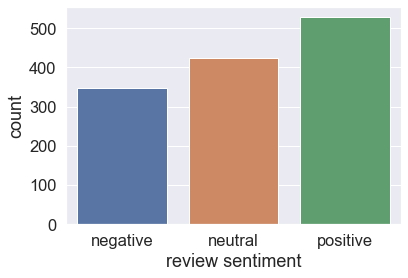

In [103]:
class_names = ['negative', 'neutral', 'positive']
ax = sns.countplot(df_full_.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names)